In [1]:
import warnings
warnings.filterwarnings('ignore')

# imports
# pandas 
import pandas as pd
# numpy
import numpy as np
# matplotlib 
import matplotlib.pyplot as plt
#%matplotlib inline
plt.style.use('ggplot')
# seaborn
import seaborn as sns
# utils
import utils
from sklearn.c import SV

In [2]:
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.regression.linear_model as sm 
import statsmodels.api as s

In [3]:
print("\n*** Read Data ***")
df = pd.read_csv('Data/mlr-qtypriceads.csv')
print("Done ...")



*** Read Data ***
Done ...


In [4]:
# columns
print("\n*** Columns ***")
print(df.columns)

# info
print("\n*** Structure ***")
print(df.info())

# summary
print("\n*** Summary ***")
#tdf = df.describe()
#print(tdf)
print(df.describe(include=np.number))
#print(df.describe(include=np.object))

# head
print("\n*** Head ***")
print(df.head())


*** Columns ***
Index(['Qty Sold', 'Unit Price', 'Advertising'], dtype='object')

*** Structure ***
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Qty Sold     15 non-null     int64  
 1   Unit Price   15 non-null     float64
 2   Advertising  15 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 488.0 bytes
None

*** Summary ***
          Qty Sold  Unit Price  Advertising
count    15.000000   15.000000    15.000000
mean   6680.000000    4.066667  2000.000000
std    1229.517908    1.678293  1225.327944
min    4700.000000    2.000000   200.000000
25%    5900.000000    2.750000  1050.000000
50%    6500.000000    4.000000  1800.000000
75%    7350.000000    5.250000  3000.000000
max    9000.000000    7.000000  4000.000000

*** Head ***
   Qty Sold  Unit Price  Advertising
0      8500         2.0         2800
1      4700         5.0   

In [5]:
# store dep variable  
# change as required
depVars = "Qty Sold"
print("\n*** Dep Vars ***")
print(depVars)


*** Dep Vars ***
Qty Sold


In [6]:
# drop cols which contain identifiers, nominals, descriptions
# change as required
print("\n*** Drop Cols ***")
#df = df.drop('id', axis=1)
print("Done ...")

# transformations
# change as required
print("\n*** Transformations ***")
print("None ...")

# check outlier count
print('\n*** Outlier Count ***')
print(utils.OutlierCount(df))

# check outlier values
print('\n*** Outlier Values ***')
print(utils.OutlierValues(df))

# handle outliers if required

# check zeros
print('\n*** Columns With Zeros ***')
print((df==0).sum())

# handle zeros if required

# check variance
print('\n*** Variance In Columns ***')
print(df.var())

# check std dev 
print('\n*** StdDev In Columns ***')
print(df.std())

# drop col if all values are same
print("\n*** Same Value Cols Drop ***")
lDropCols = utils.SameValuesCols(df, depVars)
print(lDropCols)
if lDropCols != []:
    df = df.drop(lDropCols, axis=1)
print("Done ...")

# handle normalization if required

# drop col if more than 50% null values
print("\n*** Null Value Cols Drop ***")
lDropCols = utils.NullValuesCols(df, depVars, 0.50)
print(lDropCols)
if lDropCols != []:
    df = df.drop(lDropCols, axis=1)
print("Done ...")

# check nulls
print('\n*** Columns With Nulls ***')
print(df.isnull().sum()) 

# handle nulls if required

# check relation with corelation - table
print("\n*** Correlation Table ***")
pd.options.display.float_format = '{:,.3f}'.format
print(df.corr())

# handle multi colinearity if required



*** Drop Cols ***
Done ...

*** Transformations ***
None ...

*** Outlier Count ***
Qty Sold       0
Unit Price     0
Advertising    0
dtype: int64

*** Outlier Values ***
Qty Sold       []
Unit Price     []
Advertising    []
dtype: object

*** Columns With Zeros ***
Qty Sold       0
Unit Price     0
Advertising    0
dtype: int64

*** Variance In Columns ***
Qty Sold       1.511714e+06
Unit Price     2.816667e+00
Advertising    1.501429e+06
dtype: float64

*** StdDev In Columns ***
Qty Sold       1229.517908
Unit Price        1.678293
Advertising    1225.327944
dtype: float64

*** Same Value Cols Drop ***
[]
Done ...

*** Null Value Cols Drop ***
[]
Done ...

*** Columns With Nulls ***
Qty Sold       0
Unit Price     0
Advertising    0
dtype: int64

*** Correlation Table ***
             Qty Sold  Unit Price  Advertising
Qty Sold        1.000      -0.662        0.412
Unit Price     -0.662       1.000        0.219
Advertising     0.412       0.219        1.000



*** Heat Map ***


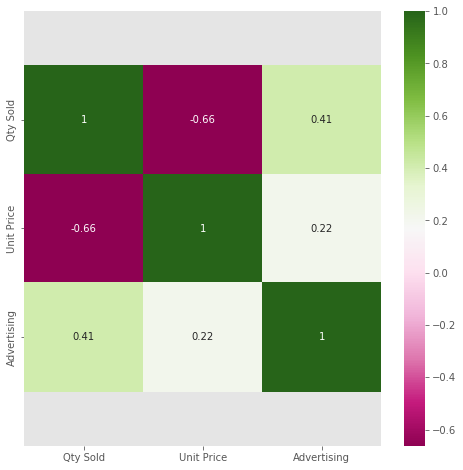


*** Boxplot ***


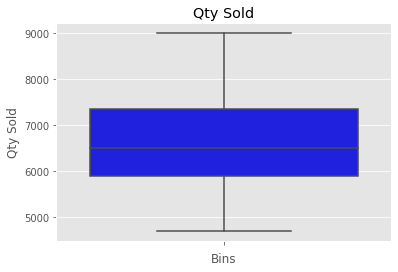

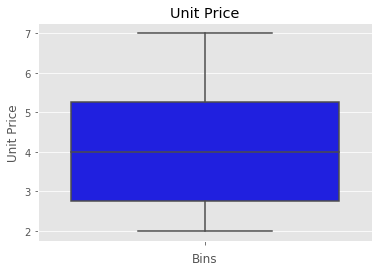

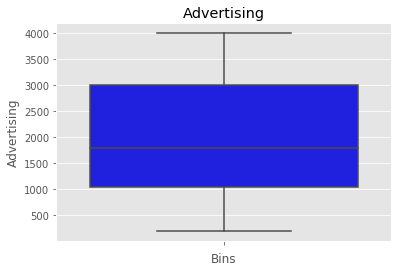


*** Histograms ***


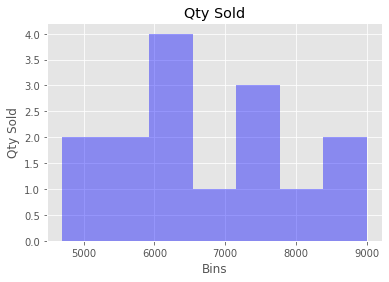

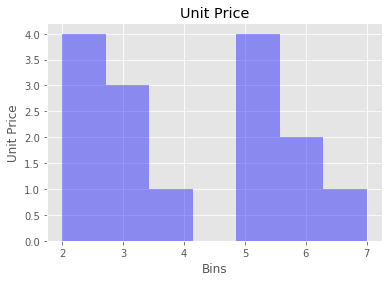

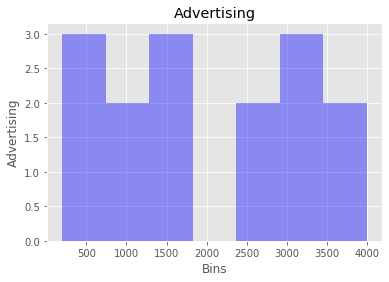


*** Scatterplot ***
Advertising


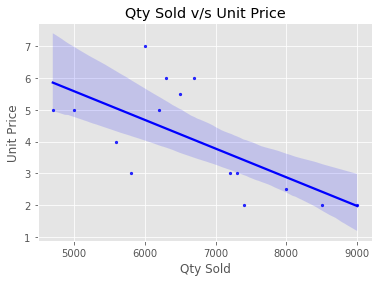

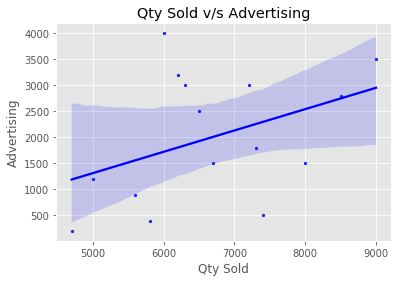


*** Distribution Plot ***
No Categoric Variables Found


In [7]:
# check relation with corelation - heatmap
print("\n*** Heat Map ***")
plt.figure(figsize=(8,8))
ax = sns.heatmap(df.corr(), annot=True, cmap="PiYG")
# data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

# boxplot
print('\n*** Boxplot ***')
colNames = df.columns.tolist()
for colName in colNames:
    plt.figure()
    sns.boxplot(y=df[colName], color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()

# histograms
# https://www.qimacros.com/histogram-excel/how-to-determine-histogram-bin-interval/
# plot histograms
print('\n*** Histograms ***')
colNames = df.columns.tolist()
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.distplot(colValues, bins=7, kde=False, color='b')
    plt.title(colName)
    plt.ylabel(colName)
    plt.xlabel('Bins')
    plt.show()

# scatterplots
# plot Sscatterplot
print('\n*** Scatterplot ***')
colNames = df.columns.tolist()
colNames.remove(depVars)
print(colName)
for colName in colNames:
    colValues = df[colName].values
    plt.figure()
    sns.regplot(data=df, x=depVars, y=colName, color= 'b', scatter_kws={"s": 5})
    plt.title(depVars + ' v/s ' + colName)
    plt.show()

# class count plot
colNames = df.columns.tolist()
colNames.remove(depVars)
print("\n*** Distribution Plot ***")
bFlag = False
for colName in colNames:
    if len(df[colName].unique()) > 7:
        continue
    plt.figure()
    sns.countplot(df[colName],label="Count")
    plt.title(colName)
    plt.show()
    cFlag = True
if bFlag==False:
    print("No Categoric Variables Found")

In [9]:
print("\n*** Prepare Data ***")
dfTrain = df.sample(frac=0.8, random_state=707)
dfTest = df.drop(dfTrain.index)
print("Train Count:",len(dfTrain.index))
print("Test Count :",len(dfTest.index))


*** Prepare Data ***
Train Count: 12
Test Count : 3


In [10]:
print("\n*** Regression Data ***")
allCols = dfTrain.columns.tolist()
print(allCols)
allCols.remove(depVars)
print(allCols)


*** Regression Data ***
['Qty Sold', 'Unit Price', 'Advertising']
['Unit Price', 'Advertising']


In [11]:
print("\n*** Regression Summary ***")
import statsmodels.api as sm
X = sm.add_constant(dfTrain[allCols])
y = dfTrain[depVars]
OlsSmry = sm.OLS(y, X)
LRModel = OlsSmry.fit()
print(LRModel.summary())



*** Regression Summary ***
                            OLS Regression Results                            
Dep. Variable:               Qty Sold   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     16.97
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           0.000883
Time:                        08:37:02   Log-Likelihood:                -93.168
No. Observations:                  12   AIC:                             192.3
Df Residuals:                       9   BIC:                             193.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7405.8086

In [12]:
# remove columns with p-value > 0.05
# chnage as require
print("\n*** Drop Cols ***")
print(allCols)
#allCols.remove('gender')
#allCols.remove('noise')
print(allCols)


*** Drop Cols ***
['Unit Price', 'Advertising']
['Unit Price', 'Advertising']


In [13]:
# regression summary for feature
print("\n*** Regression Summary Again ***")
X = sm.add_constant(dfTrain[allCols])
y = dfTrain[depVars]
OlsSmry = sm.OLS(y, X)
LRModel = OlsSmry.fit()
print(LRModel.summary())

# prepare train data
print("\n*** Regression Data For Train ***")
X_train = dfTrain[allCols].values
y_train = dfTrain[depVars].values
# print 
print(X_train.shape)
print(y_train.shape)
print(type(X_train))
print(type(y_train))
print("Done ...")

# create model
print("\n*** Regression Model ***")
from sklearn.linear_model import LinearRegression
# create empty model
model = LinearRegression()
# train model with train data
model.fit(X_train,y_train)
# predict train ... required for r2 computation
p_train = model.predict(X_train)
print(model)
print("Done ...")




*** Regression Summary Again ***
                            OLS Regression Results                            
Dep. Variable:               Qty Sold   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     16.97
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           0.000883
Time:                        08:37:21   Log-Likelihood:                -93.168
No. Observations:                  12   AIC:                             192.3
Df Residuals:                       9   BIC:                             193.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        740

In [14]:
# prepare test data
print("\n*** Regression Data For Test ***")
print(allCols)
# split
X_test = dfTest[allCols].values
y_test = dfTest[depVars].values
# print
print(X_test.shape)
print(y_test.shape)
print(type(X_test))
print(type(y_test))
print("Done ...")

# predict
print("\n*** Predict - Test Data ***")
p_test = model.predict(X_test)
dfTest['predict'] = p_test
print("Done ...")


*** Regression Data For Test ***
['Unit Price', 'Advertising']
(3, 2)
(3,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Done ...

*** Predict - Test Data ***
Done ...



*** Scatter Plot ***


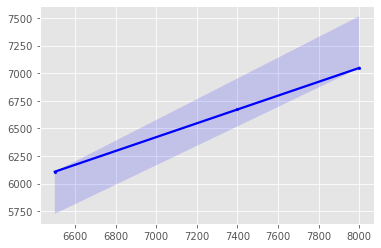


*** R-Square ***
0.7904143795281656

*** Adj R-Square ***
0.7438397972010913

*** Mean Absolute Error ***
690.9306102226756

*** Mean Squared Error ***
530379.6096647949


In [15]:
# visualize 
print("\n*** Scatter Plot ***")
plt.figure()
#sns.regplot(data=dfTest, x=depVars, y='predict', color='b', scatter_kws={"s": 5})
sns.regplot(x=y_test, y=p_test, color='b', scatter_kws={"s": 5})
plt.show()

# R-Square
print('\n*** R-Square ***')
from sklearn.metrics import r2_score
r2 = r2_score(y_train, p_train)
print(r2)

# adj r-square  
print('\n*** Adj R-Square ***')
adj_r2 = (1 - (1 - r2) * ((X_train.shape[0] - 1) / 
          (X_train.shape[0] - X_train.shape[1] - 1)))
print(adj_r2)

# mae 
print("\n*** Mean Absolute Error ***")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, p_test)
print(mae)

# mse 
print("\n*** Mean Squared Error ***")
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, p_test)
print(mse)

In [16]:
# rmse 
# RMSE measures the error.  How good is an error depends on the amplitude of your data. 
# RMSE should be less 10% for mean(depVars)
print("\n*** Root Mean Squared Error ***")
rmse = np.sqrt(mse)
print(rmse)


# scatter index (SI) is defined to judge whether RMSE is good or not. 
# SI=RMSE/mean of actual data 
# If SI is less than one, your estimations are acceptable.
# closer to zero the better
# https://www.theanalysisfactor.com/assessing-the-fit-of-regression-models/
# also called normalised RMSE
# https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/
print('\n*** Scatter Index ***')
si = rmse/y_train.mean()
print(si)

# relative root mean squared error
# Excellent when RRMSE < .1
# Good when RRMSE is between .1 and .2
# Fair when RRMSE is between .2 and .5
# Poor when RRMSE > .5
def getRRMSE(true, pred):
    num = np.sum(np.square(true - pred))
    den = np.sum(np.square(pred))
    squared_error = num/den
    rrmse = np.sqrt(squared_error)
    return rrmse
print('\n*** Relative Root Mean Squared Error ***')
rrmse = getRRMSE(y_train, p_train)
print(rrmse)



*** Root Mean Squared Error ***
728.271659248659

*** Scatter Index ***
0.1116125148273807

*** Relative Root Mean Squared Error ***
0.08608094865793804


In [17]:
# regression summary for feature
print("\n*** Regression Summary Again ***")
X = sm.add_constant(df[allCols])
y = df[depVars]
OlsSmry = sm.OLS(y, X)
LRModel = OlsSmry.fit()
print(LRModel.summary())

# now create linear regression model
print("\n*** Regression Model ***")
X = df[allCols].values
y = df[depVars].values
model = LinearRegression()
model.fit(X,y)
print(model)

# read dataset
print("\n*** Predict Data - Read ***")
dfp = pd.read_csv('./data/mlr-qtypriceads-prd.csv')
print("Done ...")

print("\n*** Structure ***")
print(dfp.info())

print("\n*** Head ***")
print(dfp.head())

# not required
print("\n*** Drop Cols ***")
print("N/A ... ")

# transformation
# change as required
print("\n*** Transformation ***")
print("None ... ")

# check nulls
print('\n*** Columns With Nulls ***')
print(dfp[allCols].isnull().sum()) 
print("Done ... ")

# split X & y
print("\n*** Split Predict Data ***")
print(allCols)
print(depVars)
X_pred = dfp[allCols].values
#y_pred = dfp[depVars].values
print(X_pred)
#print(y_pred)

# predict
print("\n*** Predict Data ***")
p_pred = model.predict(X_pred)
dfp['predict'] = p_pred
print("Done ... ")

# no y_pred values given
# so show predicted values
for idx in dfp.index:
     print(dfp['Unit Price'][idx], dfp['Advertising'][idx], dfp['predict'][idx])



*** Regression Summary Again ***
                            OLS Regression Results                            
Dep. Variable:               Qty Sold   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     19.39
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           0.000174
Time:                        08:51:08   Log-Likelihood:                -116.66
No. Observations:                  15   AIC:                             239.3
Df Residuals:                      12   BIC:                             241.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        786

In [18]:
print("\n*** Classfier Object ***")
model = SVC(random_state=1)
print(model)
# fit the model
model.fit(X,y)


*** Classfier Object ***


NameError: name 'SVC' is not defined